# Forcasting with LSTM on NGA time serie

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [43]:
path_1 = "../Data/test_st.csv"

df = pd.read_csv(path_1)

In [44]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [45]:
df.index = pd.to_datetime(df['value_created_at'])

In [46]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2023-06-24 15:05:48,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
2023-06-24 15:22:51,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2023-06-24 15:50:00,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
2023-06-24 15:55:00,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
2023-06-24 16:00:00,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
2024-03-01 06:40:00,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
2024-03-01 07:40:00,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
2024-03-01 08:40:00,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526


In [47]:
nga = df['NGA']

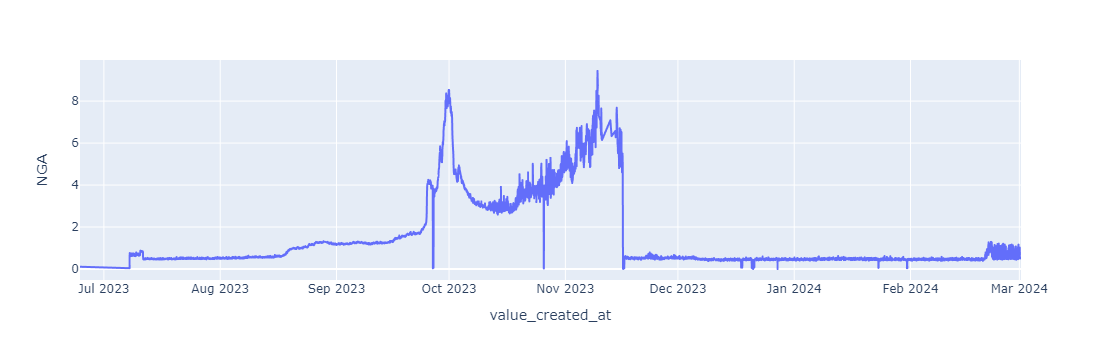

In [48]:
fig = px.line(nga, y='NGA')
fig.show()

In [49]:
nga.index

DatetimeIndex(['2023-06-24 15:05:48', '2023-06-24 15:22:51',
               '2023-06-24 15:50:00', '2023-06-24 15:55:00',
               '2023-06-24 16:00:00', '2023-06-24 16:05:00',
               '2023-06-24 16:10:00', '2023-06-24 16:20:00',
               '2023-06-24 16:30:00', '2023-07-07 20:37:52',
               ...
               '2024-03-01 01:40:00', '2024-03-01 02:40:00',
               '2024-03-01 03:40:00', '2024-03-01 04:40:00',
               '2024-03-01 05:40:00', '2024-03-01 06:40:00',
               '2024-03-01 07:40:00', '2024-03-01 08:40:00',
               '2024-03-01 09:40:00', '2024-03-01 10:40:00'],
              dtype='datetime64[ns]', name='value_created_at', length=5704, freq=None)

In [50]:
diff = np.diff(nga.index)/1e9
diff = diff.astype(np.int32)
diff

array([1023, 1629,  300, ..., 3600, 3600, 3600])

In [56]:
x=np.where(diff!=3600)[0]
y=diff[diff!=3600]

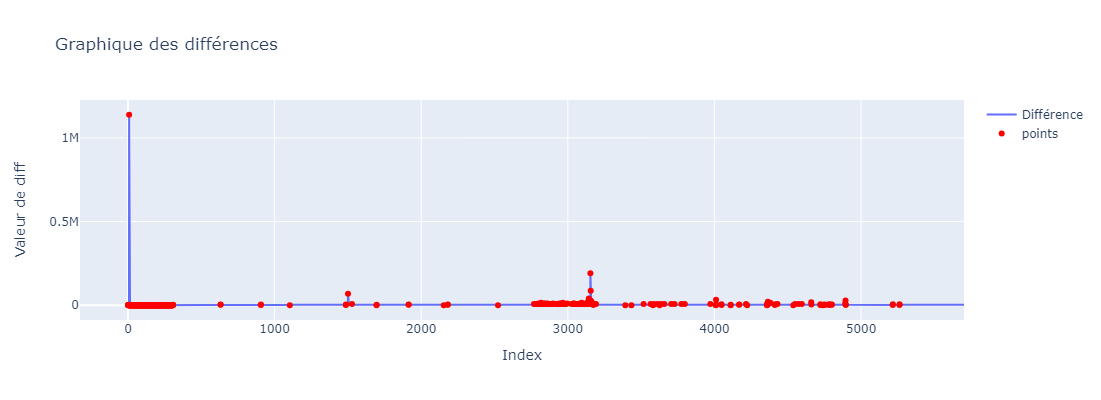

In [62]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(len(diff)), y=diff, mode='lines', name='Différence'))

fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(color='red'), name = "points"))

fig.update_layout(
    width=1000,
    height=400,
    title='Graphique des différences',
    xaxis_title='Index',
    yaxis_title='Valeur de diff'
)

fig.show()

<b>Remarks:</b>
- From the above plot we can see that not all points are 1-hour separated
- And inconsistencies are occuring everywhere
- Thus, we cannot have sufficient interval with 1-hour separated points
- A possible solution is make an interpolation with available points, then sample every 1 hour from the interpolation 

In [64]:
from sklearn.preprocessing import MinMaxScaler

def df_to_X_y(df, window_size=5, delay=1):
  df_as_np = df.to_numpy()
  scaler=MinMaxScaler(feature_range=(0,1)) 
  nga = scaler.fit_transform(df_as_np.reshape(-1,1))
  df_as_np = nga.reshape(1,-1)[0]
  X = []
  y = []
  for i in range(len(df_as_np)-window_size-delay+1):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size+delay-1]
    y.append(label)
  return np.array(X), np.array(y)

In [65]:
DELAY = 1
WINDOW_SIZE = 382

X, y = df_to_X_y(nga, WINDOW_SIZE,1)
X.shape, y.shape

((5322, 382, 1), (5322,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1915, 382, 1), (1915,), (479, 382, 1), (479,), (2928, 382, 1), (2928,))

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [68]:
model1 = Sequential()
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(units=28, dropout=0.06297029003850252, recurrent_dropout=0.5818137908766273))
model1.add(Dense(55, activation='relu'))
model1.add(Dense(1, activation='linear'))


model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.007009812507590492), metrics=[MeanSquaredError()])
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 5.6699e-04 - val_mean_squared_error: 5.6788e-04
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 6.4830e-04 - val_mean_squared_error: 6.4896e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 4.7358e-04 - val_mean_squared_error: 4.7459e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 6.5890e-04 - val_mean_squared_error: 6.5991e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - loss: 0.0015 - mean

In [69]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step


,Test Predictions,Actuals
0,0.365403,0.371403
1,0.363049,0.368920
2,0.361010,0.373460
3,0.361104,0.443823
4,0.383156,0.364685
...,...,...
2923,0.069014,0.058120
2924,0.067882,0.055987
2925,0.066486,0.058769
2926,0.066331,0.052975


In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, model1.predict(X_test))
print(f"Score R²: {r2:.4f}")

mae = mean_absolute_error(y_test, model1.predict(X_test))
print(f"Mean absolute error: {mae:.4f}")

mse = mean_squared_error(y_test, model1.predict(X_test))
print(f"Mean squared error: {mse:.4f}")

rmse = np.sqrt(mse)
print(f"Root Mean squared error: {rmse:.4f}")


92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step
Score R²: 0.9697
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step
Mean absolute error: 0.0164
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step
Mean squared error: 0.0009
Root Mean squared error: 0.0303


In [77]:
metrics_values = [r2, mae, mse, rmse]
metrics_values = [round(value * 100, 2) for value in metrics_values]

metrics_df = pd.DataFrame({
    'Metric': ['R² Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'],
    'Value': metrics_values
})

print(metrics_df)

                    Metric  Value
0                 R² Score  96.97
1      Mean Absolute Error   1.64
2       Mean Squared Error   0.09
3  Root Mean Squared Error   3.03


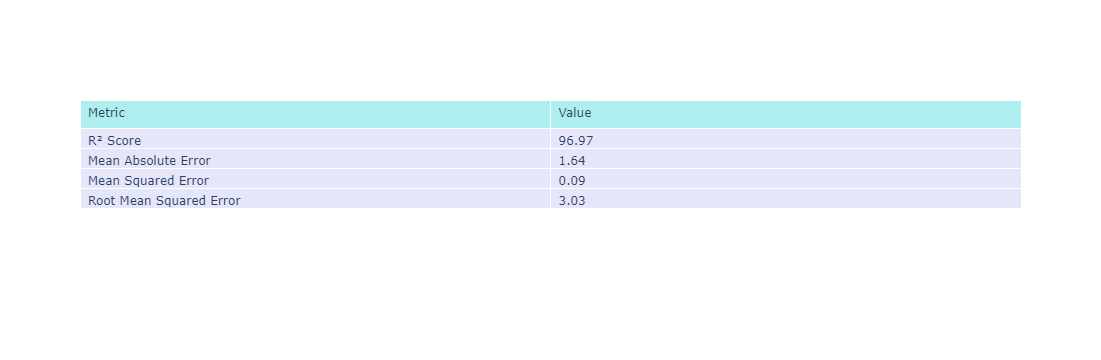

In [78]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(metrics_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[metrics_df['Metric'], metrics_df['Value'].round(4)],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [74]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step


,Train Predictions,Actuals
0,0.059809,0.052684
1,0.060126,0.052364
2,0.060282,0.050567
3,0.060022,0.051316
4,0.059997,0.053664
...,...,...
1910,0.797473,0.862070
1911,0.797481,0.830635
1912,0.787981,0.816458
1913,0.778356,0.809079


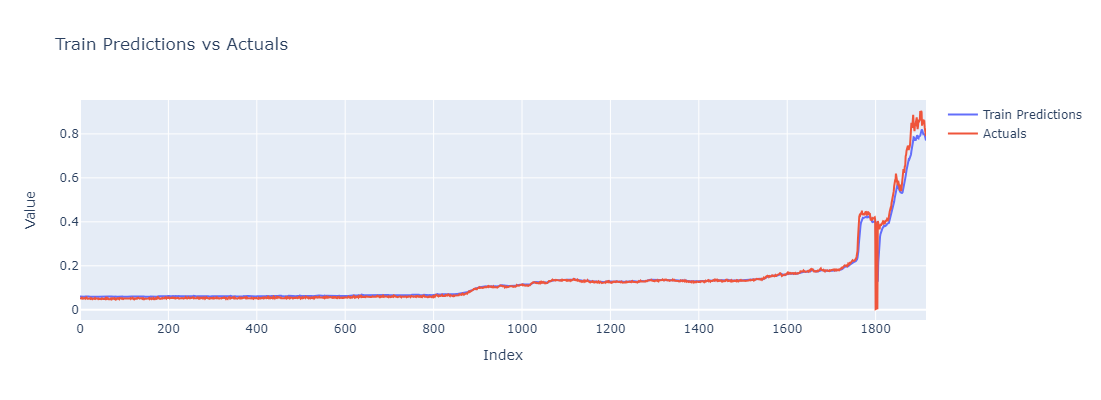

In [76]:
train_predictions = train_results['Train Predictions']
actuals = train_results['Actuals']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.arange(len(train_predictions)),
    y=train_predictions,
    mode='lines',
    name='Train Predictions'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(actuals)),
    y=actuals,
    mode='lines',
    name='Actuals'
))

fig.update_layout(
    width=1000,
    height=400,
    title='Train Predictions vs Actuals',
    xaxis_title='Index',
    yaxis_title='Value'
)

fig.show()

In [79]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


,Val Predictions,Actuals
0,0.759185,0.820081
1,0.761313,0.796401
2,0.754631,0.793408
3,0.749888,0.793257
4,0.746704,0.774401
...,...,...
474,0.351325,0.345233
475,0.345830,0.402940
476,0.360332,0.348336
477,0.352288,0.381175


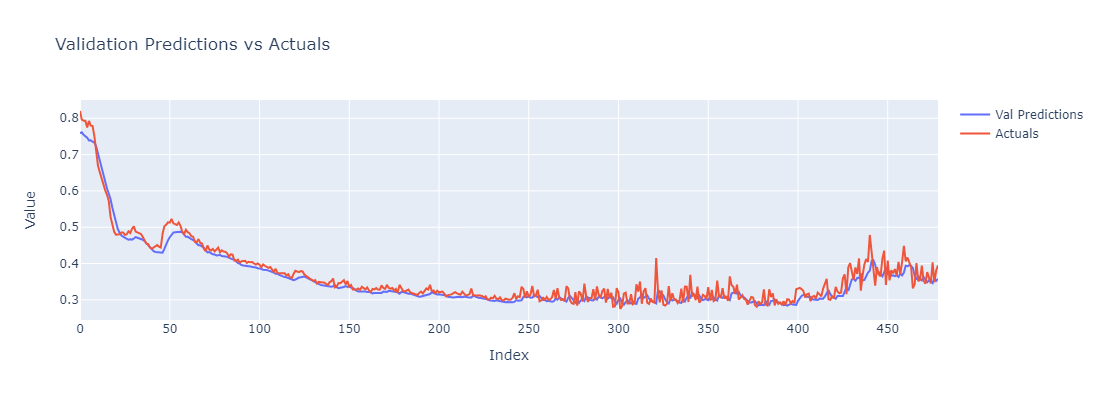

In [80]:
val_predictions = val_results['Val Predictions']
val_actuals = val_results['Actuals']

fig_val = go.Figure()

fig_val.add_trace(go.Scatter(
    x=np.arange(len(val_predictions)),
    y=val_predictions,
    mode='lines',
    name='Val Predictions'
))

fig_val.add_trace(go.Scatter(
    x=np.arange(len(val_actuals)),
    y=val_actuals,
    mode='lines',
    name='Actuals'
))

fig_val.update_layout(
    width=1000,
    height=400,
    title='Validation Predictions vs Actuals',
    xaxis_title='Index',
    yaxis_title='Value'
)

fig_val.show()

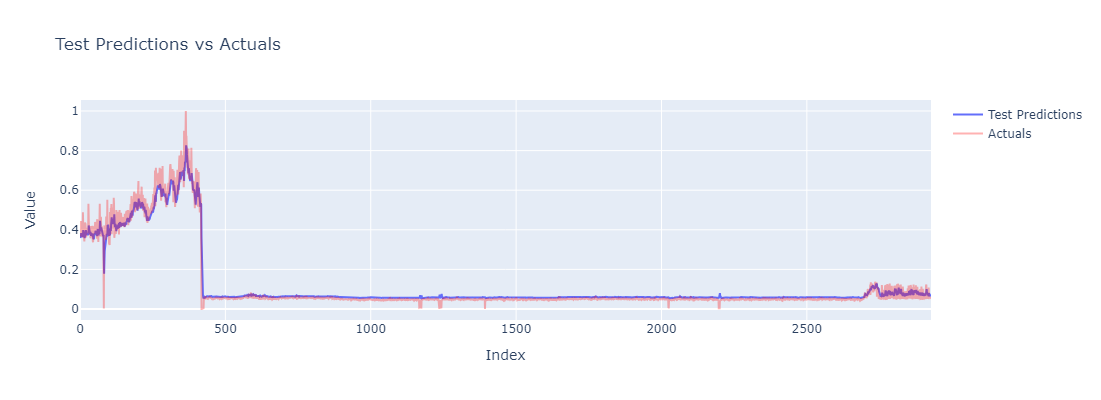

In [81]:
test_predictions = test_results['Test Predictions']
test_actuals = test_results['Actuals']

fig_test = go.Figure()

fig_test.add_trace(go.Scatter(
    x=np.arange(len(test_predictions)),
    y=test_predictions,
    mode='lines',
    name='Test Predictions'
))

fig_test.add_trace(go.Scatter(
    x=np.arange(len(test_actuals)),
    y=test_actuals,
    mode='lines',
    line=dict(width=2, color='red'),
    opacity=0.3,
    name='Actuals'
))

fig_test.update_layout(
    width=1000,
    height=400,
    title='Test Predictions vs Actuals',
    xaxis_title='Index',
    yaxis_title='Value'
)

fig_test.show()

In [ ]:
# import mlflow 
# def create_mlflow_experiments(experiment_name : str , artifact_location : str , tags ) -> str : 
#     try :
#         experiment_id = mlflow.create_experiment(
#         name = experiment_name,
#         artifact_location = artifact_location,
#         tags = tags,
#         )
#     except :
#         print(f"Experiment {experiment_name} already exits ........")
#         experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
#     return experiment_id

# def get_mlflow_experiment(experiment_id : str = None , experiment_name:str = None) -> mlflow.entities.Experiment:
#     if experiment_id is not None :
#         experiment = mlflow.get_experiment(experiment_id)
#     elif experiment_name is not None :
#         experiment = mlflow.get_experiment_by_name(experiment_name)
#     else :
#         raise ValueError("Either experiment_id or experiment_name must be provided .")
#     return experiment

# if __name__ == "__main__" :
#     experiment_id = create_mlflow_experiments("LSTM_24H","LSTM_24H_artifacts",{"env" : "dev" , "version" : "1.0.0"})
#     print(f"Expirement ID : {experiment_id} ")

In [ ]:
# from tensorflow.keras.models import load_model

# df = pd.read_csv('Data/test_st.csv')

# def run_model(df,periods = 1):
#     df['value_created_at'] = pd.to_datetime(df['value_created_at'])
#     df.set_index('value_created_at', inplace=True)
#     nga = df[['NGA']]
#     nga['set'] = 'actual'
#     #st.write(nga)
#     model1 = load_model('model_nga_1h_2.keras')
#     for period in range(periods) :
#         prediction = model1.predict(nga.NGA.values[-300:].reshape((-1,300,1)))
#         last_timestamp = nga.index[-1]
#         new_timestamp = last_timestamp + pd.Timedelta(hours=1)
#         new_row = pd.DataFrame({'value_created_at': [new_timestamp], 'NGA': [prediction[0][0]]})
#         new_row['set'] = 'predicted'
#         new_row.set_index('value_created_at', inplace=True)
#         nga = pd.concat([nga, new_row], ignore_index=False)
        
#     return nga

In [ ]:
# if __name__ == "__main__":

#     experiment = get_mlflow_experiment(experiment_name="LSTM_1H")
#     print("Name: {}".format(experiment.name))

#     with mlflow.start_run(run_name=f"logging_models_1H_v1.0.0", experiment_id = experiment.experiment_id) as run:

#         # Your machine learning code goes here


#         metrics = {
#             "mse": mse,
#             "mae": mae,
#             "rmse": rmse,
#             "r2": r2
#         }

#         mlflow.log_metrics(metrics)

#         # print run info
#         print("run_id: {}".format(run.info.run_id))
#         print("experiment_id: {}".format(run.info.experiment_id))
#         print("status: {}".format(run.info.status))
#         print("start_time: {}".format(run.info.start_time))
#         print("end_time: {}".format(run.info.end_time))
#         print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

In [ ]:
# if __name__=="__main__":

#     experiment = get_mlflow_experiment(experiment_name="LSTM_24H")
#     print("Name: {}".format(experiment.name))

#     with mlflow.start_run(run_name="logging_models_24H_v1.0.0", experiment_id=experiment.experiment_id) as run:

#         model1 = Sequential()
#         model1.add(InputLayer((WINDOW_SIZE, 1)))
#         model1.add(LSTM(28))
#         model1.add(Dense(55, 'relu'))
#         model1.add(Dense(1, 'linear'))
        
#         model1.summary()

#         #mlflow.autolog()
        
#         model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.007), metrics=[MeanSquaredError()])
#         model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])
        
#         # log model        
#         mlflow.keras.log_model(model1, artifact_path="logging_models_24H_v1.0.0")
#         # print info about the run
#         print("run_id: {}".format(run.info.run_id))
#         print("experiment_id: {}".format(run.info.experiment_id))
#         print("status: {}".format(run.info.status))
#         print("start_time: {}".format(run.info.start_time))
#         print("end_time: {}".format(run.info.end_time))
#         print("lifecycle_stage: {}".format(run.info.lifecycle_stage))